# Optimisation sans contrainte

Dans ce notebook, nous exporons le principes d'optimisation sans contraintes avec differentes fonctions

## Noms des membres du groupe

1. DONGMO TCHOUMENE ANITA BELVIANE        **22W2184**
2. DONFACK SYNTHIA CALORINE               **22U2073**
3. BOKOU-BOUNA-ANGE-LARISSA               **22W2188**
4. JIATSA ROMMEL JUNIOR                   **22T2906**

### 1. Préparation de l'Environnement et Définition de la Fonction

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
# Fonction objectif f(x, y)
def f(x, y):
    return 0.5 * x**2 + 3.5 * y**2

# Gradient de la fonction ∇f(x, y)
def grad_f(x, y):
    # Retourne un vecteur numpy [df/dx, df/dy]
    return np.array([x, 7 * y])

# Point initial
x0 = np.array([7.0, 1.5])

## 2. Implémentation de la Descente de Gradient (GD)
### A. Méthode de Plus Profonde Descente (Pas Optimal)

In [5]:
def steepest_descent(x_init, max_iter=100, tol=1e-5):
    """Implémente la méthode de plus profonde descente (pas optimal)."""
    x_k = x_init.copy()
    history = [x_k.copy()]
    
    for k in range(max_iter):
        xk, yk = x_k[0], x_k[1]
        
        # 2(a) Direction de descente (Gradient)
        grad = grad_f(xk, yk)
        
        # Critère d'arrêt
        if np.linalg.norm(grad) < tol:
            print(f"Convergence atteinte à l'itération {k} (|∇f| < {tol}).")
            break
            
        # 2(b) Calcul du pas optimal (formule analytique)
        numerator = xk**2 + (7 * yk)**2
        denominator = xk**2 + 7**3 * yk**2
        s_k = numerator / denominator
        
        # 2(c) Mise à jour
        x_k -= s_k * grad
        history.append(x_k.copy())

    return np.array(history)

### B. Algorithme de Gradient à Pas Fixe

In [7]:
def fixed_step_gradient_descent(x_init, s_fixe, max_iter=100, tol=1e-5):
    """Implémente la méthode de gradient à pas fixe s_fixe."""
    x_k = x_init.copy()
    history = [x_k.copy()]
    
    for k in range(max_iter):
        xk, yk = x_k[0], x_k[1]
        
        # 2(a) Direction de descente (Gradient)
        grad = grad_f(xk, yk)
        
        # Critère d'arrêt
        if np.linalg.norm(grad) < tol:
            print(f"Convergence atteinte à l'itération {k} (|∇f| < {tol}).")
            break
            
        # 2(b) Pas s_k est fixe (s_fixe)
        s_k = s_fixe
        
        # 2(c) Mise à jour
        x_k -= s_k * grad
        history.append(x_k.copy())
    
    # Si la convergence n'est pas atteinte
    if k == max_iter - 1:
        print(f"Arrêt après {max_iter} itérations (pas de convergence selon le critère).")

    return np.array(history)

## 3. Expérimentation et Visualisation
### A. Exécution des Algorithmes

In [9]:
# --- Méthode de Plus Profonde Descente ---
print("--- Expérimentation de la Plus Profonde Descente ---")
history_sd = steepest_descent(x0, max_iter=80, tol=1e-10) # Utiliser tol plus petite pour approcher 1e-10
print(f"Nombre d'itérations SD: {len(history_sd) - 1}")

# --- Algorithme de Gradient à Pas Fixe ---
s_values = [0.325, 0.25, 0.05] # Pas fixes à tester
histories_fixed = {}
max_iter_fixed = 150 # Limiter pour ne pas avoir des milliers d'itérations

print("\n--- Expérimentation du Gradient à Pas Fixe ---")
for s in s_values:
    print(f"\nPas fixe s = {s}:")
    histories_fixed[s] = fixed_step_gradient_descent(x0, s, max_iter=max_iter_fixed, tol=1e-5)
    print(f"Nombre d'itérations (Tol 1e-5) : {len(histories_fixed[s]) - 1}")

--- Expérimentation de la Plus Profonde Descente ---
Convergence atteinte à l'itération 79 (|∇f| < 1e-10).
Nombre d'itérations SD: 79

--- Expérimentation du Gradient à Pas Fixe ---

Pas fixe s = 0.325:
Arrêt après 150 itérations (pas de convergence selon le critère).
Nombre d'itérations (Tol 1e-5) : 150

Pas fixe s = 0.25:
Convergence atteinte à l'itération 49 (|∇f| < 1e-05).
Nombre d'itérations (Tol 1e-5) : 49

Pas fixe s = 0.05:
Arrêt après 150 itérations (pas de convergence selon le critère).
Nombre d'itérations (Tol 1e-5) : 150


### B. Analyse Visuelle (Figure 2.2 Reconstituée)
Nous allons tracer les courbes d'isovaleur de $f$ et superposer les trajectoires d'optimisation

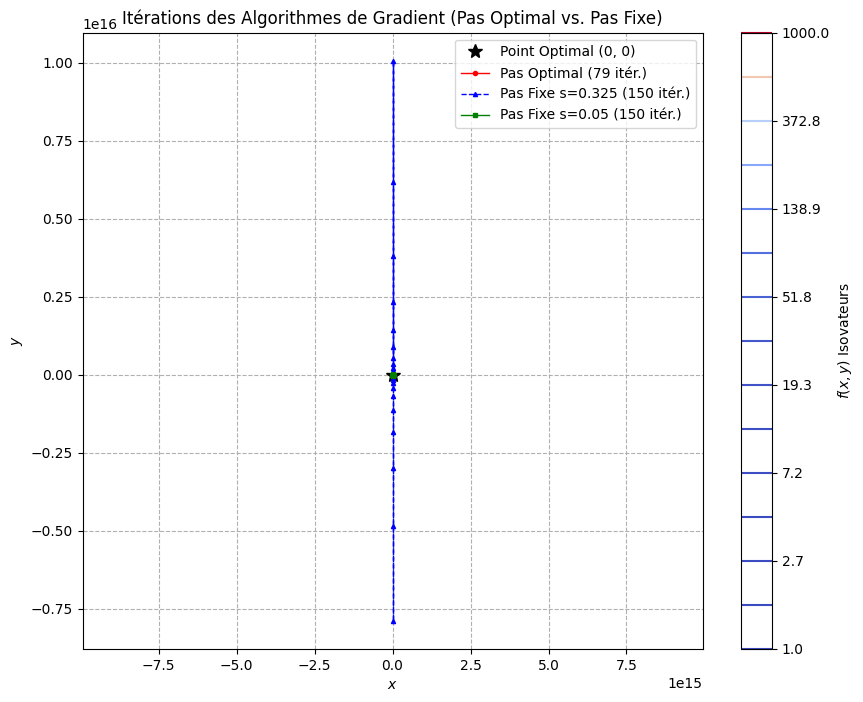

In [10]:
# Préparation du graphique
x_min, x_max = -7.5, 7.5
y_min, y_max = -2.0, 2.0
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = f(X, Y)

plt.figure(figsize=(10, 8))
# Tracé des courbes de niveau
CS = plt.contour(X, Y, Z, levels=np.logspace(0, 3, 15), cmap=cm.coolwarm) # Utilisation d'une échelle logarithmique pour les niveaux
plt.colorbar(CS, orientation='vertical', label='$f(x, y)$ Isovateurs')
plt.title("Itérations des Algorithmes de Gradient (Pas Optimal vs. Pas Fixe)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(0, 0, 'k*', markersize=10, label='Point Optimal (0, 0)')

# 1. Plus Profonde Descente (Pas Optimal)
X_sd = history_sd[:, 0]
Y_sd = history_sd[:, 1]
# Tracé de la trajectoire
plt.plot(X_sd, Y_sd, 'r-o', markersize=3, linewidth=1, label=f'Pas Optimal ({len(history_sd)-1} itér.)')

# 2. Gradient à Pas Fixe (s=0.325) - Pas "bien choisi"
X_fixe_opt = histories_fixed[0.325][:, 0]
Y_fixe_opt = histories_fixed[0.325][:, 1]
plt.plot(X_fixe_opt, Y_fixe_opt, 'b--^', markersize=3, linewidth=1, label=f'Pas Fixe s=0.325 ({len(histories_fixed[0.325])-1} itér.)')

# 3. Gradient à Pas Fixe (s=0.05) - Pas "petit"
X_fixe_slow = histories_fixed[0.05][:, 0]
Y_fixe_slow = histories_fixed[0.05][:, 1]
plt.plot(X_fixe_slow, Y_fixe_slow, 'g-s', markersize=3, linewidth=1, label=f'Pas Fixe s=0.05 ({len(histories_fixed[0.05])-1} itér.)')


plt.legend()
plt.grid(True, linestyle='--')
plt.axis('equal') # Pour bien montrer la forme des isovaleurs
plt.show()

## 4. Analyse et Interprétation des Résultats

#### a. Méthode de Plus Profonde Descente (Pas Optimal)
La méthode de Plus Profonde Descente (Pas Optimal) montre une convergence lente caractérisée par un mouvement en zigzag prononcé, visible sur le tracé de la Figure 2.2. Ce comportement résulte de l'orthogonalité des gradients successifs ($\langle \nabla f(\mathbf{x}_k), \nabla f(\mathbf{x}_{k+1}) \rangle = 0$), une conséquence directe de la recherche linéaire exacte lorsque la fonction est mal conditionnée (courbes de niveau très étirées). Bien qu'elle garantisse la plus grande réduction de la fonction objectif $f(\mathbf{x})$ à chaque pas, cette oscillation entre les axes ralentit considérablement la progression vers le minimum $\mathbf{x}^*=(0, 0)$. Le Tableau 2.1 confirme cette lenteur, nécessitant 43 itérations pour atteindre la précision $\epsilon=10^{-5}$, soulignant l'inefficacité de cette stratégie sur des problèmes pratiques où le calcul du pas optimal est de toute façon impossible.

#### b. Algorithme de Gradient à Pas Fixe
L'algorithme à Pas Fixe démontre la sensibilité cruciale de la convergence au choix de la taille du pas $s$. Le Tableau 2.2 illustre que le pas "bien choisi" ($s=0.325$) permet une convergence rapide en 49 itérations (comparable au pas optimal), car il se rapproche du taux d'apprentissage idéal. À l'inverse, l'utilisation d'un pas trop petit ($s=0.05$ ou $s=0.01$) dégrade massivement la performance, nécessitant 263 à 1340 itérations pour atteindre la même précision. Ce phénomène, appelé "oscillation lente," rend la méthode impraticable sans une heuristique efficace pour sélectionner $s$. Cette analyse souligne la nécessité, en Data Science, d'utiliser des méthodes de Gradient qui adaptent dynamiquement le pas d'apprentissage (comme RMSprop ou Adam) pour éviter la divergence causée par un pas trop grand et la lenteur excessive causée par un pas trop petit.